Plotting Cross-Validated Predictions

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

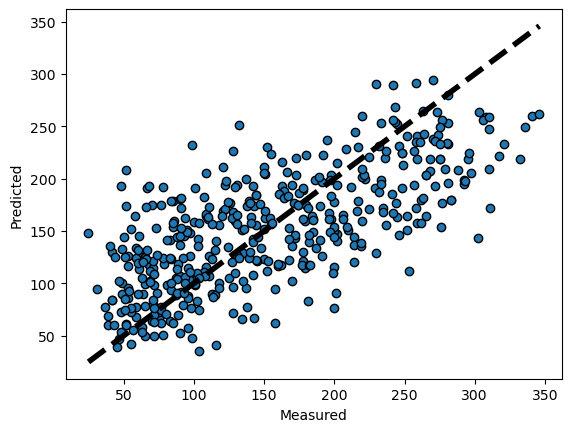

In [2]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np


lr = linear_model.LinearRegression()
X, y = datasets.load_diabetes(return_X_y=True)

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Data analysis with Pandas

In [3]:
import pandas as pd
df = pd.DataFrame(
	{"Sample": ["S1", "S2"],
	't0': [0.1, 0.2],
	't1': [1.5, 2],
	't2': [2.5, 2.8],
	't3': [3, 3.5],
	't4': [4.4, 1.2],
	't5': [3.7, 2.1]})
df.shape 

(2, 7)

In [4]:
# Gather time columns [t0, ..., t5] into rows
df = pd.melt(df,
		id_vars = 'Sample',
		var_name = 'Time', 
		value_name = 'Exprs')

In [5]:
df

,Sample,Time,Exprs
0,S1,t0,0.1
1,S2,t0,0.2
2,S1,t1,1.5
3,S2,t1,2.0
4,S1,t2,2.5
5,S2,t2,2.8
6,S1,t3,3.0
7,S2,t3,3.5
8,S1,t4,4.4
9,S2,t4,1.2


In [6]:
df = pd.pivot_table(df,
			values='Exprs',
			columns='Sample',
			index='Time')
df

Sample,S1,S2
Time,,
t0,0.1,0.2
t1,1.5,2.0
t2,2.5,2.8
t3,3.0,3.5
t4,4.4,1.2
t5,3.7,2.1


<Axes: >

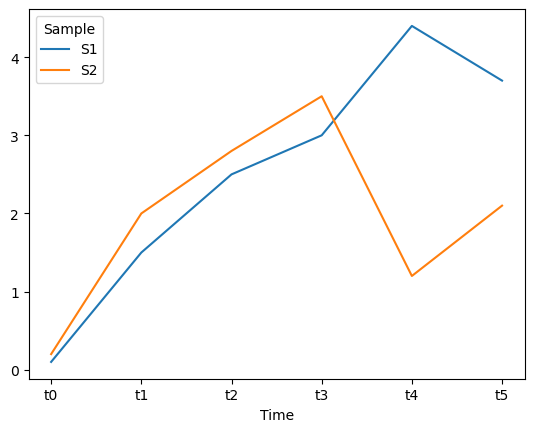

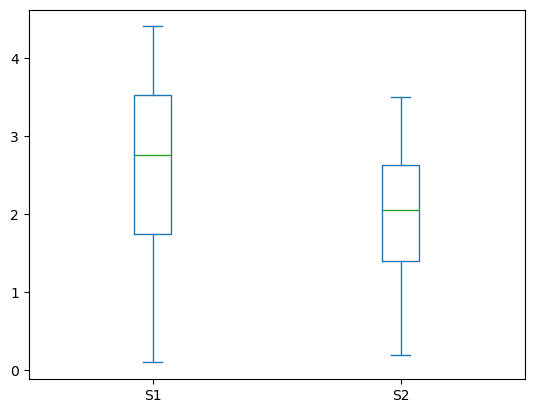

In [7]:
# Time-plot
df.plot(y=['S1', 'S2'])
# Box-plot
df.plot(y=['S1', 'S2'], kind='box')

In [8]:
df['S1'].median()

2.75

In [9]:
df['S2'].median()

2.05

<Axes: >

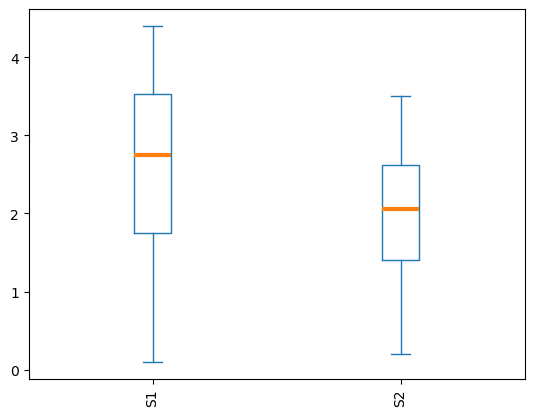

In [10]:
# Box plot
df.plot(kind='box', rot=90, color={'medians': 'red'}, medianprops={'linewidth': 3})

<Axes: xlabel='Time'>

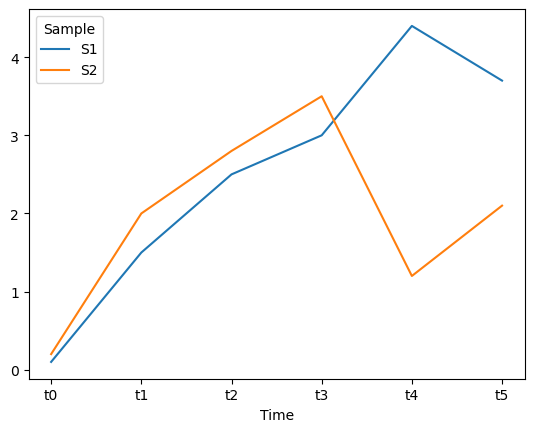

In [11]:
# multi timeline
df.plot(y=['S1', 'S2'])

scipy.stats

In [12]:
from scipy import stats

In [13]:
from scipy.stats import norm

In [14]:
samples = np.random.normal(size=1000)

In [15]:
bins = np.arange(-4, 5)

In [16]:
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [17]:
histogram = np.histogram(samples, bins=bins, density=True)[0]

In [18]:
bins = 0.5*(bins[1:] + bins[:-1])

In [19]:
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

In [20]:
pdf = stats.norm.pdf(bins)  # norm is a distribution object

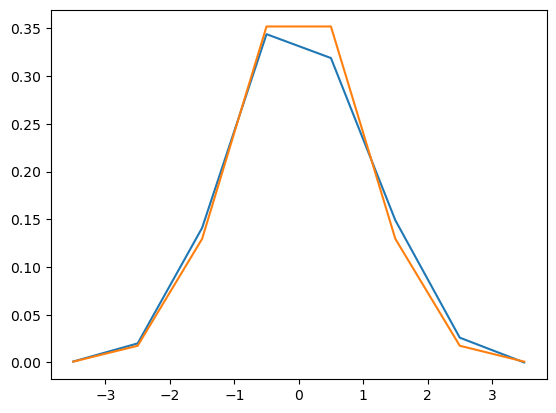

In [21]:
plt.plot(bins, histogram) 
plt.plot(bins, pdf) 

In [22]:
np.mean(samples)

0.014529110891984097

In [23]:
np.median(samples)

-0.009336221202266163

In [24]:
stats.scoreatpercentile(samples, 50) 

-0.009336221202266163

In [25]:
stats.scoreatpercentile(samples, 90) 

1.3142174588737314

Statistical tests

In [26]:
a = np.random.normal(0, 1, size=100)

In [27]:
b = np.random.normal(1, 1, size=10)

In [28]:
stats.ttest_ind(a, b)

TtestResult(statistic=-1.378370039654949, pvalue=0.17093778667238024, df=108.0)

In [29]:

x = [11, 13, 8, 16, 23, 24, 30, 16, 9, 18]
type(x)
#x

list

Descriptive statistics

In [30]:
# convert x to numpy array
x = np.array(x)

print(x.min())   # equivalent to np.min(x)
# 8
print(x.max())   # equivalent to np.max(x)
# 30
print(x.mean())  # equivalent to np.mean(x)
# 16.8
print(x.var())   # equivalent to np.var(x))
# 45.36
print(x.sum())
# 168
print(np.median(x))

8
30
16.8
45.36
168
16.0


In [31]:
m, v, s, k = stats.t.stats(10, moments='mvsk')
n, (smin, smax), sm, sv, ss, sk = stats.describe(x)
m

0.0

T-test and KS-test

In [32]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, m))

t-statistic =  7.483 pvalue = 0.0000


In [33]:
tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print('t-statistic = %6.3f pvalue = %6.4f' % (tt, pval))

t-statistic =  7.483 pvalue = 0.0000


In [34]:
print('KS-statistic D = %6.3f pvalue = %6.4f' % stats.kstest(x, 't', (10,)))

KS-statistic D =  1.000 pvalue = 0.0000


Special tests for normal distributions

In [35]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(x))
#normal skewtest teststat =  2.785 pvalue = 0.0054  # random
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(x))
#normal kurtosistest teststat =  4.757 pvalue = 0.0000  # random

normal skewtest teststat =  0.874 pvalue = 0.3819
normal kurtosistest teststat = -0.163 pvalue = 0.8708


c:\Users\bisha\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [36]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(x))

normaltest teststat =  0.791 pvalue = 0.6733


https://docs.scipy.org/doc/scipy/tutorial/stats.html

Measures of Central Tendency

In [37]:
print(x.mean())
# or 
mean = sum(x) / len(x)
mean

16.8


16.8

In [38]:
# Harmonic Mean
hmean = len(x) / sum(1 / item for item in x)
hmean

14.225214542387663

In [39]:
# Weighted Mean
y = [1, 3, 5, 7, 9, 10, 12, 14, 15, 16]
wmean = sum(y[i] * x[i] for i in range(len(x))) / sum(y)
wmean

18.0

In [40]:
# Geometric Mean
scipy.stats.gmean(x)

15.47120474800591

In [41]:
# Median
statistics.median(x)

16.0

In [42]:
# Mode
statistics.mode(x)

16

Measures of Variability

In [43]:
statistics.variance(x)

50

In [45]:
statistics.stdev(x)

AttributeError: 'numpy.int32' object has no attribute 'bit_length'

In [46]:
scipy.stats.skew(x, bias=False)

0.5846768190780606

In [47]:
np.percentile(x, 5) # the 5th percentile

8.45

In [48]:
np.percentile(x, 95) # the 95th percentile

27.299999999999994

In [49]:
np.percentile(x, [25, 50, 75]) #25th, 50th and 75th percentile

array([11.5 , 16.  , 21.75])

In [50]:
np.percentile(x, 50)

16.0

Ranges

In [51]:
# difference between the maximum and minimum
np.ptp(x)

22

In [52]:
max(x)-min(x)

22

In [53]:
min(x)

8

In [54]:
scipy.stats.describe(x, bias=False) # correcting the skewness and kurtosis for statistical bias

DescribeResult(nobs=10, minmax=(8, 30), mean=16.8, variance=50.4, skewness=0.5846768190780606, kurtosis=-0.42418400340735873)

In [55]:

st = scipy.stats.describe(x)
st

DescribeResult(nobs=10, minmax=(8, 30), mean=16.8, variance=50.4, skewness=0.4930427849036961, kurtosis=-0.7853970120284051)

In [56]:
x = pd.Series([22, 13, 14, 55, 10])
x.describe() # Using pandas function

count     5.000000
mean     22.800000
std      18.539148
min      10.000000
25%      13.000000
50%      14.000000
75%      22.000000
max      55.000000
dtype: float64

Correalation

In [57]:
x = [11, 13, 8, 16, 23, 24, 30, 16, 9, 18]
y = [1, 3, 5, 7, 9, 10, 12, 14, 15, 16]

Covariance

In [58]:
cov_matrix = np.cov(x, y)
cov_matrix
cov_xy = cov_matrix[0, 1] # or [1, 0]
cov_xy

12.266666666666667

R

In [59]:
std_x=statistics.stdev(x)
std_y=statistics.stdev(y)
cov_xy = 12.26666666666
r = cov_xy / (std_x * std_y)
r

0.33487994802645404

In [61]:
r, p = scipy.stats.pearsonr(x, y) # using stats function of scipy library 
r

0.3348799480266361

In [62]:
p

0.3442215013372621

In [63]:
corr_matrix = np.corrcoef(x, y) # using corrcoef from numpy
corr_matrix
r = corr_matrix[0, 1]
r

0.33487994802663607

In [64]:
lg = scipy.stats.linregress(x, y)
lg

LinregressResult(slope=0.24338624338624337, intercept=5.111111111111111, rvalue=0.33487994802663607, pvalue=0.3442215013372624, stderr=0.24212131035281, intercept_stderr=4.382328832535581)

In [65]:
r = lg.rvalue
r

0.33487994802663607

In [ ]:
import pandas
#data = pd.read_csv (r'D:\Python\Python_for_Researchers\brain_size.csv', encoding='unicode_escape')
data.head() 

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Python\\Python_for_Researchers\\brain_size.csv'

In [67]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

In [68]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


Manipulating data

Hypothesis testing: comparing two groups

In [69]:
from scipy import stats

Student’s t-test: the simplest statistical test

In [70]:
stats.ttest_1samp(x, 0)    # one sample

TtestResult(statistic=7.483314773547883, pvalue=3.75801166724644e-05, df=9)

In [71]:
stats.ttest_ind(x, y)   # two sample

TtestResult(statistic=2.738454755684762, pvalue=0.01350066550703028, df=18.0)

In [72]:
df = pandas.DataFrame({'x': x, 'y': y})

In [73]:
from statsmodels.formula.api import ols
model = ols("y ~ x", df).fit()

In [74]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.010
Date:                Sat, 12 Apr 2025   Prob (F-statistic):              0.344
Time:                        15:25:06   Log-Likelihood:                -29.477
No. Observations:                  10   AIC:                             62.95
Df Residuals:                       8   BIC:                             63.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1111      4.382      1.166      0.2

c:\Users\bisha\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Multiple variables

In [93]:
import pandas
#data = pd.read_csv (r'D:\Python\Python_for_Researchers\brain_size.csv', encoding='unicode_escape')
data.head() 

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,.,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65,951545


In [94]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Sat, 03 Jul 2021   Prob (F-statistic):              0.445
Time:                        02:38:57   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [95]:
model = ols("x ~ y + 1", df).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.010
Date:                Sat, 03 Jul 2021   Prob (F-statistic):              0.344
Time:                        02:40:01   Log-Likelihood:                -32.668
No. Observations:                  10   AIC:                             69.34
Df Residuals:                       8   BIC:                             69.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.5609      4.777      2.630      0.0

C:\Users\Azad\miniconda3\envs\da35\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Multiple Regression: including multiple factors

In [102]:
b = [2, 4, 6, 8, 10, 11, 13, 15, 17, 19]
b

[2, 4, 6, 8, 10, 11, 13, 15, 17, 19]

In [115]:
model = ols('x ~ y + b', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1.439
Date:                Sat, 03 Jul 2021   Prob (F-statistic):              0.300
Time:                        02:59:02   Log-Likelihood:                -31.541
No. Observations:                  10   AIC:                             69.08
Df Residuals:                       7   BIC:                             69.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7079      5.139      3.057      0.0

C:\Users\Azad\miniconda3\envs\da35\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [105]:
df

,x,y
0,11,1
1,13,3
2,8,5
3,16,7
4,23,9
5,24,10
6,30,12
7,16,14
8,9,15
9,18,16


In [110]:
df

,0,1,2,3,4,5,6,7,8,9
0,11,13,8,16,23,24,30,16,9,18
1,1,3,5,7,9,10,12,14,15,16
2,2,4,6,8,10,11,13,15,17,19


In [112]:
df = pandas.DataFrame({'x': x, 'y': y, 'b':b})

In [113]:
df

,b,x,y
0,2,11,1
1,4,13,3
2,6,8,5
3,8,16,7
4,10,23,9
5,11,24,10
6,13,30,12
7,15,16,14
8,17,9,15
9,19,18,16


In [114]:
model = ols('x ~ y + b', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     1.439
Date:                Sat, 03 Jul 2021   Prob (F-statistic):              0.300
Time:                        02:55:47   Log-Likelihood:                -31.541
No. Observations:                  10   AIC:                             69.08
Df Residuals:                       7   BIC:                             69.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7079      5.139      3.057      0.0

C:\Users\Azad\miniconda3\envs\da35\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


analysis of variance (ANOVA)

In [119]:
fvalue, pvalue = stats.f_oneway(df['x'], df['y'], df['b'])
print(fvalue, pvalue)

4.572409552116431 0.019488978036786876


C:\Users\Azad\miniconda3\envs\da35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


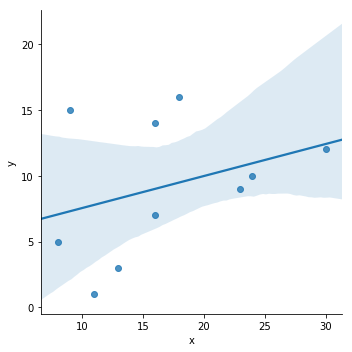

In [122]:
import seaborn as sns
sns.lmplot(y='y', x='x', data=df) 

In [127]:
result = sm.ols(formula='VIQ ~ Height + WEIGHT * Gender',
                data=data).fit()    
print(result.summary()) 

AttributeError: 'numpy.float64' object has no attribute 'ols'

In [124]:
data = data.reindex(columns=['VIQ', 'Height','Weight', 'Gender'])

In [126]:
data = data.select_dtypes(include='number').iloc[0]